In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scanpy as sc
from scipy.spatial.distance import pdist
from sklearn.metrics import pairwise_distances
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import normalize

In [2]:
from skimage.filters import threshold_minimum, threshold_mean, threshold_otsu

In [3]:
import matplotlib.pylab as plt

In [4]:
sc.set_figure_params(dpi=200)

In [5]:
sc.settings.n_jobs = 16

In [6]:
adata = sc.read_csv('Simulated_Session_Count_Matrix.csv')
adata.raw = adata

In [7]:
adata.obs = pd.read_csv("Simulated_Session_Metadata.csv",index_col=0)

AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …


In [8]:
adata.obs.start_time = pd.to_datetime(adata.obs.start_time)
adata.obs.end_time = pd.to_datetime(adata.obs.end_time)

In [9]:
adata.obs['session_duration'] = adata.obs.end_time - adata.obs.start_time

In [10]:
event_sums = adata.raw.X.sum(axis=0) #calculate total number of times each unique event is observed

In [11]:
event_sums.astype(bool).sum() #19 unique events

19

In [12]:
transformer = TfidfTransformer(smooth_idf=False)
adata.X = transformer.fit_transform(adata.X).toarray()

In [18]:
sc.pp.pca(adata,n_comps=10) #Realistically this PCA is not necessary for such a small dataset of 200 entries, but here we choose 10 components as it encompasses ~100% of the variance

In [19]:
sc.tl.tsne(adata,perplexity = np.sqrt(adata.n_obs).astype(int))

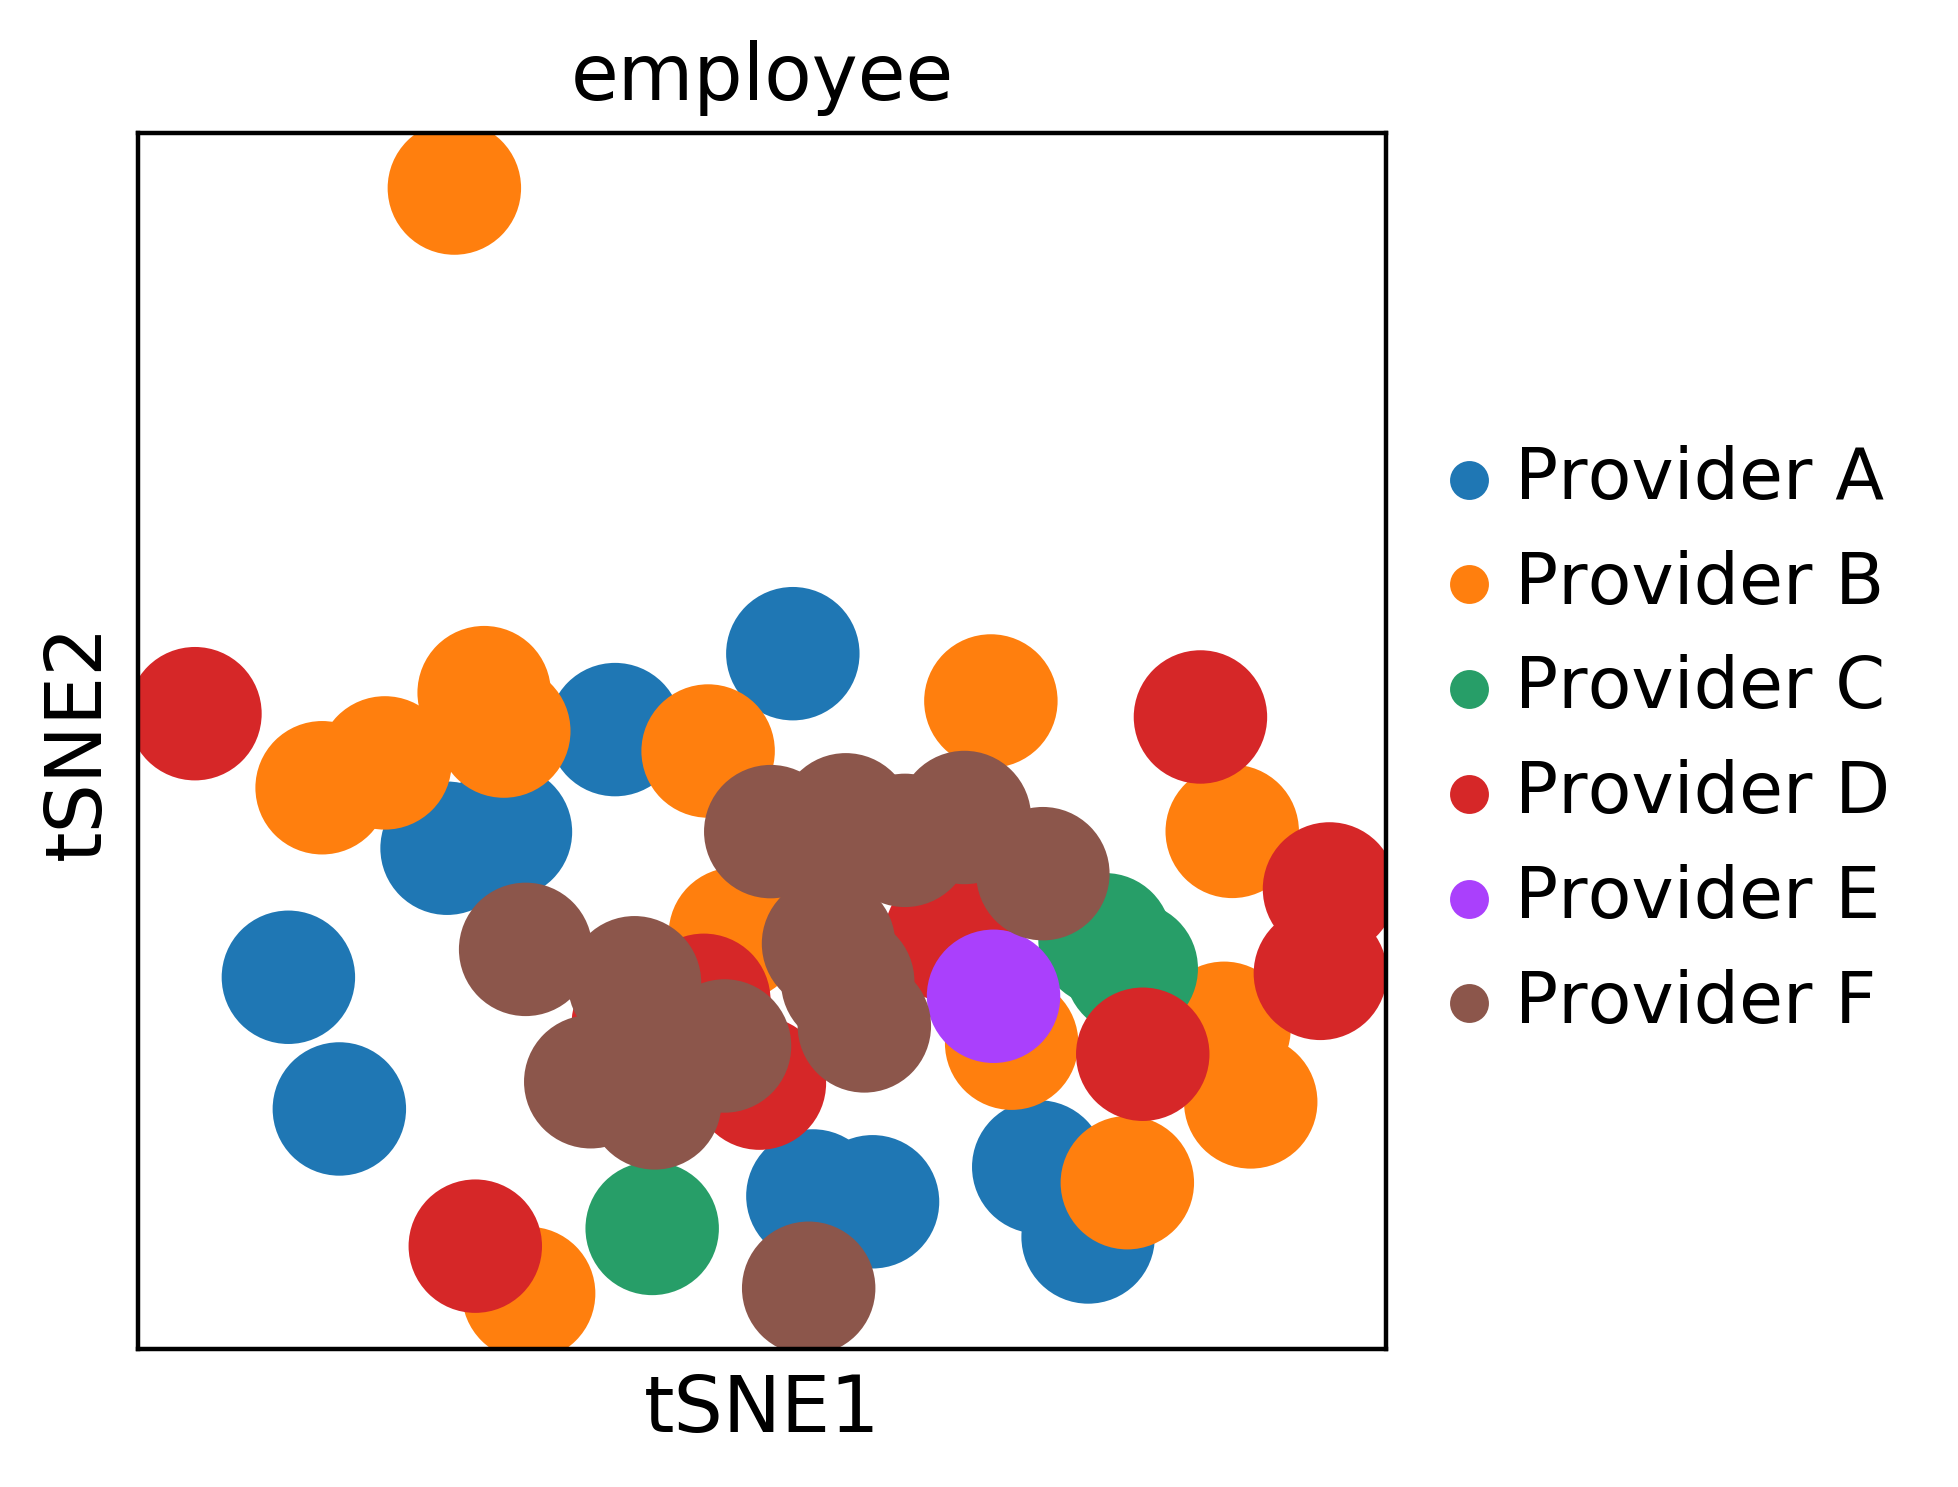

In [20]:
sc.pl.tsne(adata,color=['employee'])

In [25]:
sc.pp.neighbors(adata,n_neighbors=np.sqrt(adata.n_obs).astype(int),use_rep='X_tsne')
sc.tl.leiden(adata)

/home/bob/anaconda3/envs/hci/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:89: DeprecationWarning: Use is_view instead of isview, isview will be removed in the future.
  if adata.isview:  # we shouldn't need this here...
/home/bob/anaconda3/envs/hci/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:106: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = neighbors.distances
/home/bob/anaconda3/envs/hci/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:107: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = neighbors.connectivities
/home/bob/anaconda3/envs/hci/lib/python3.7/site-packages/scanpy/tools/_leiden.py:98: FutureWarning: This location for 'con

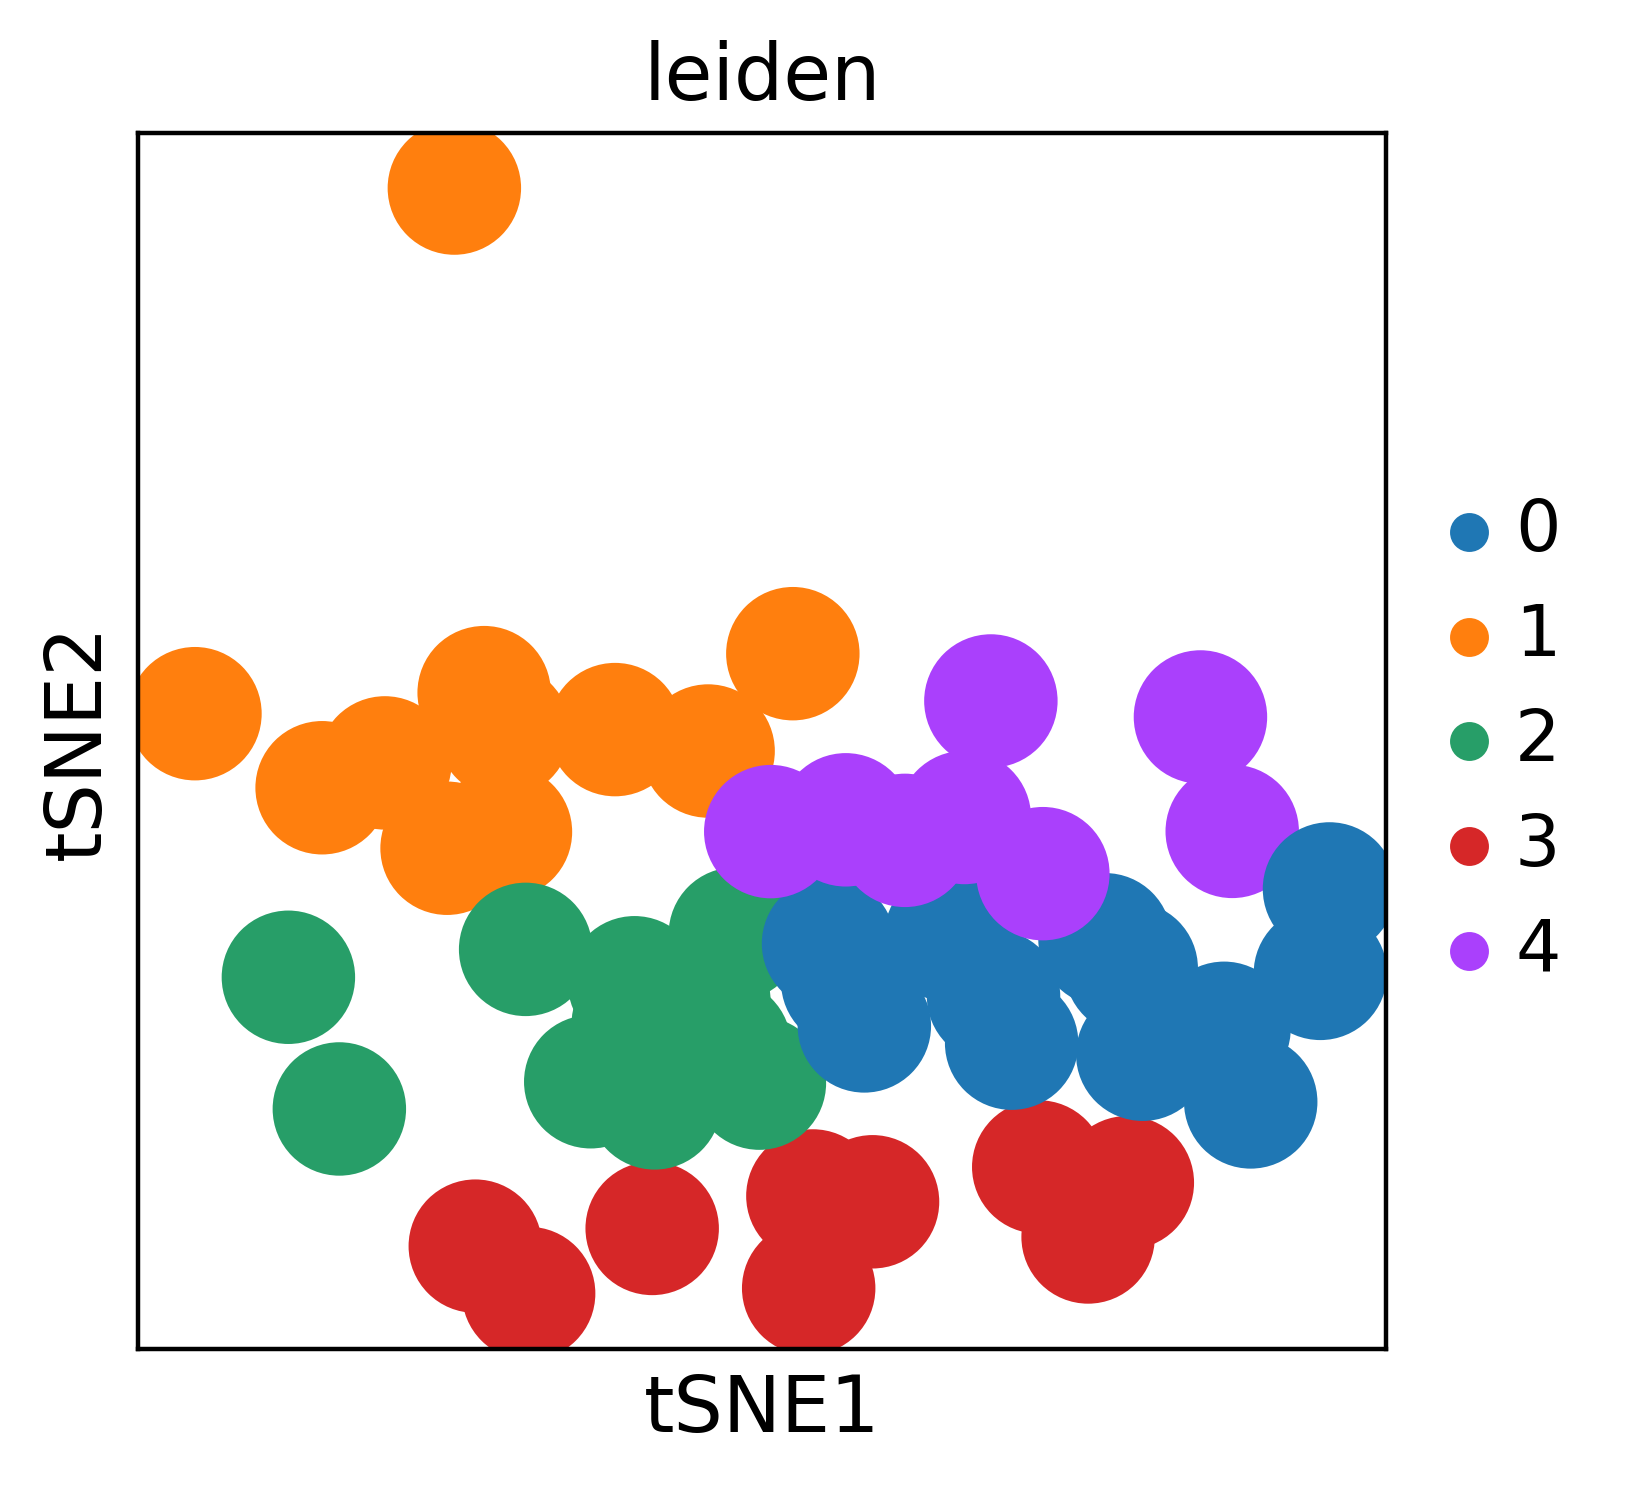

In [48]:
sc.pl.tsne(adata,color=['leiden'])

In [38]:
adata.obs['n_unique_events'] = adata.raw.X.astype(bool).sum(axis=1)
adata.obs['count_sum'] = adata.raw.X.sum(axis=1)

In [37]:
adata.obs['session_diversity_coef'] = adata.obs['n_unique_events']/19

In [40]:
adata.obs['session_repetition_coef'] = adata.obs['count_sum']/adata.obs['n_unique_events']

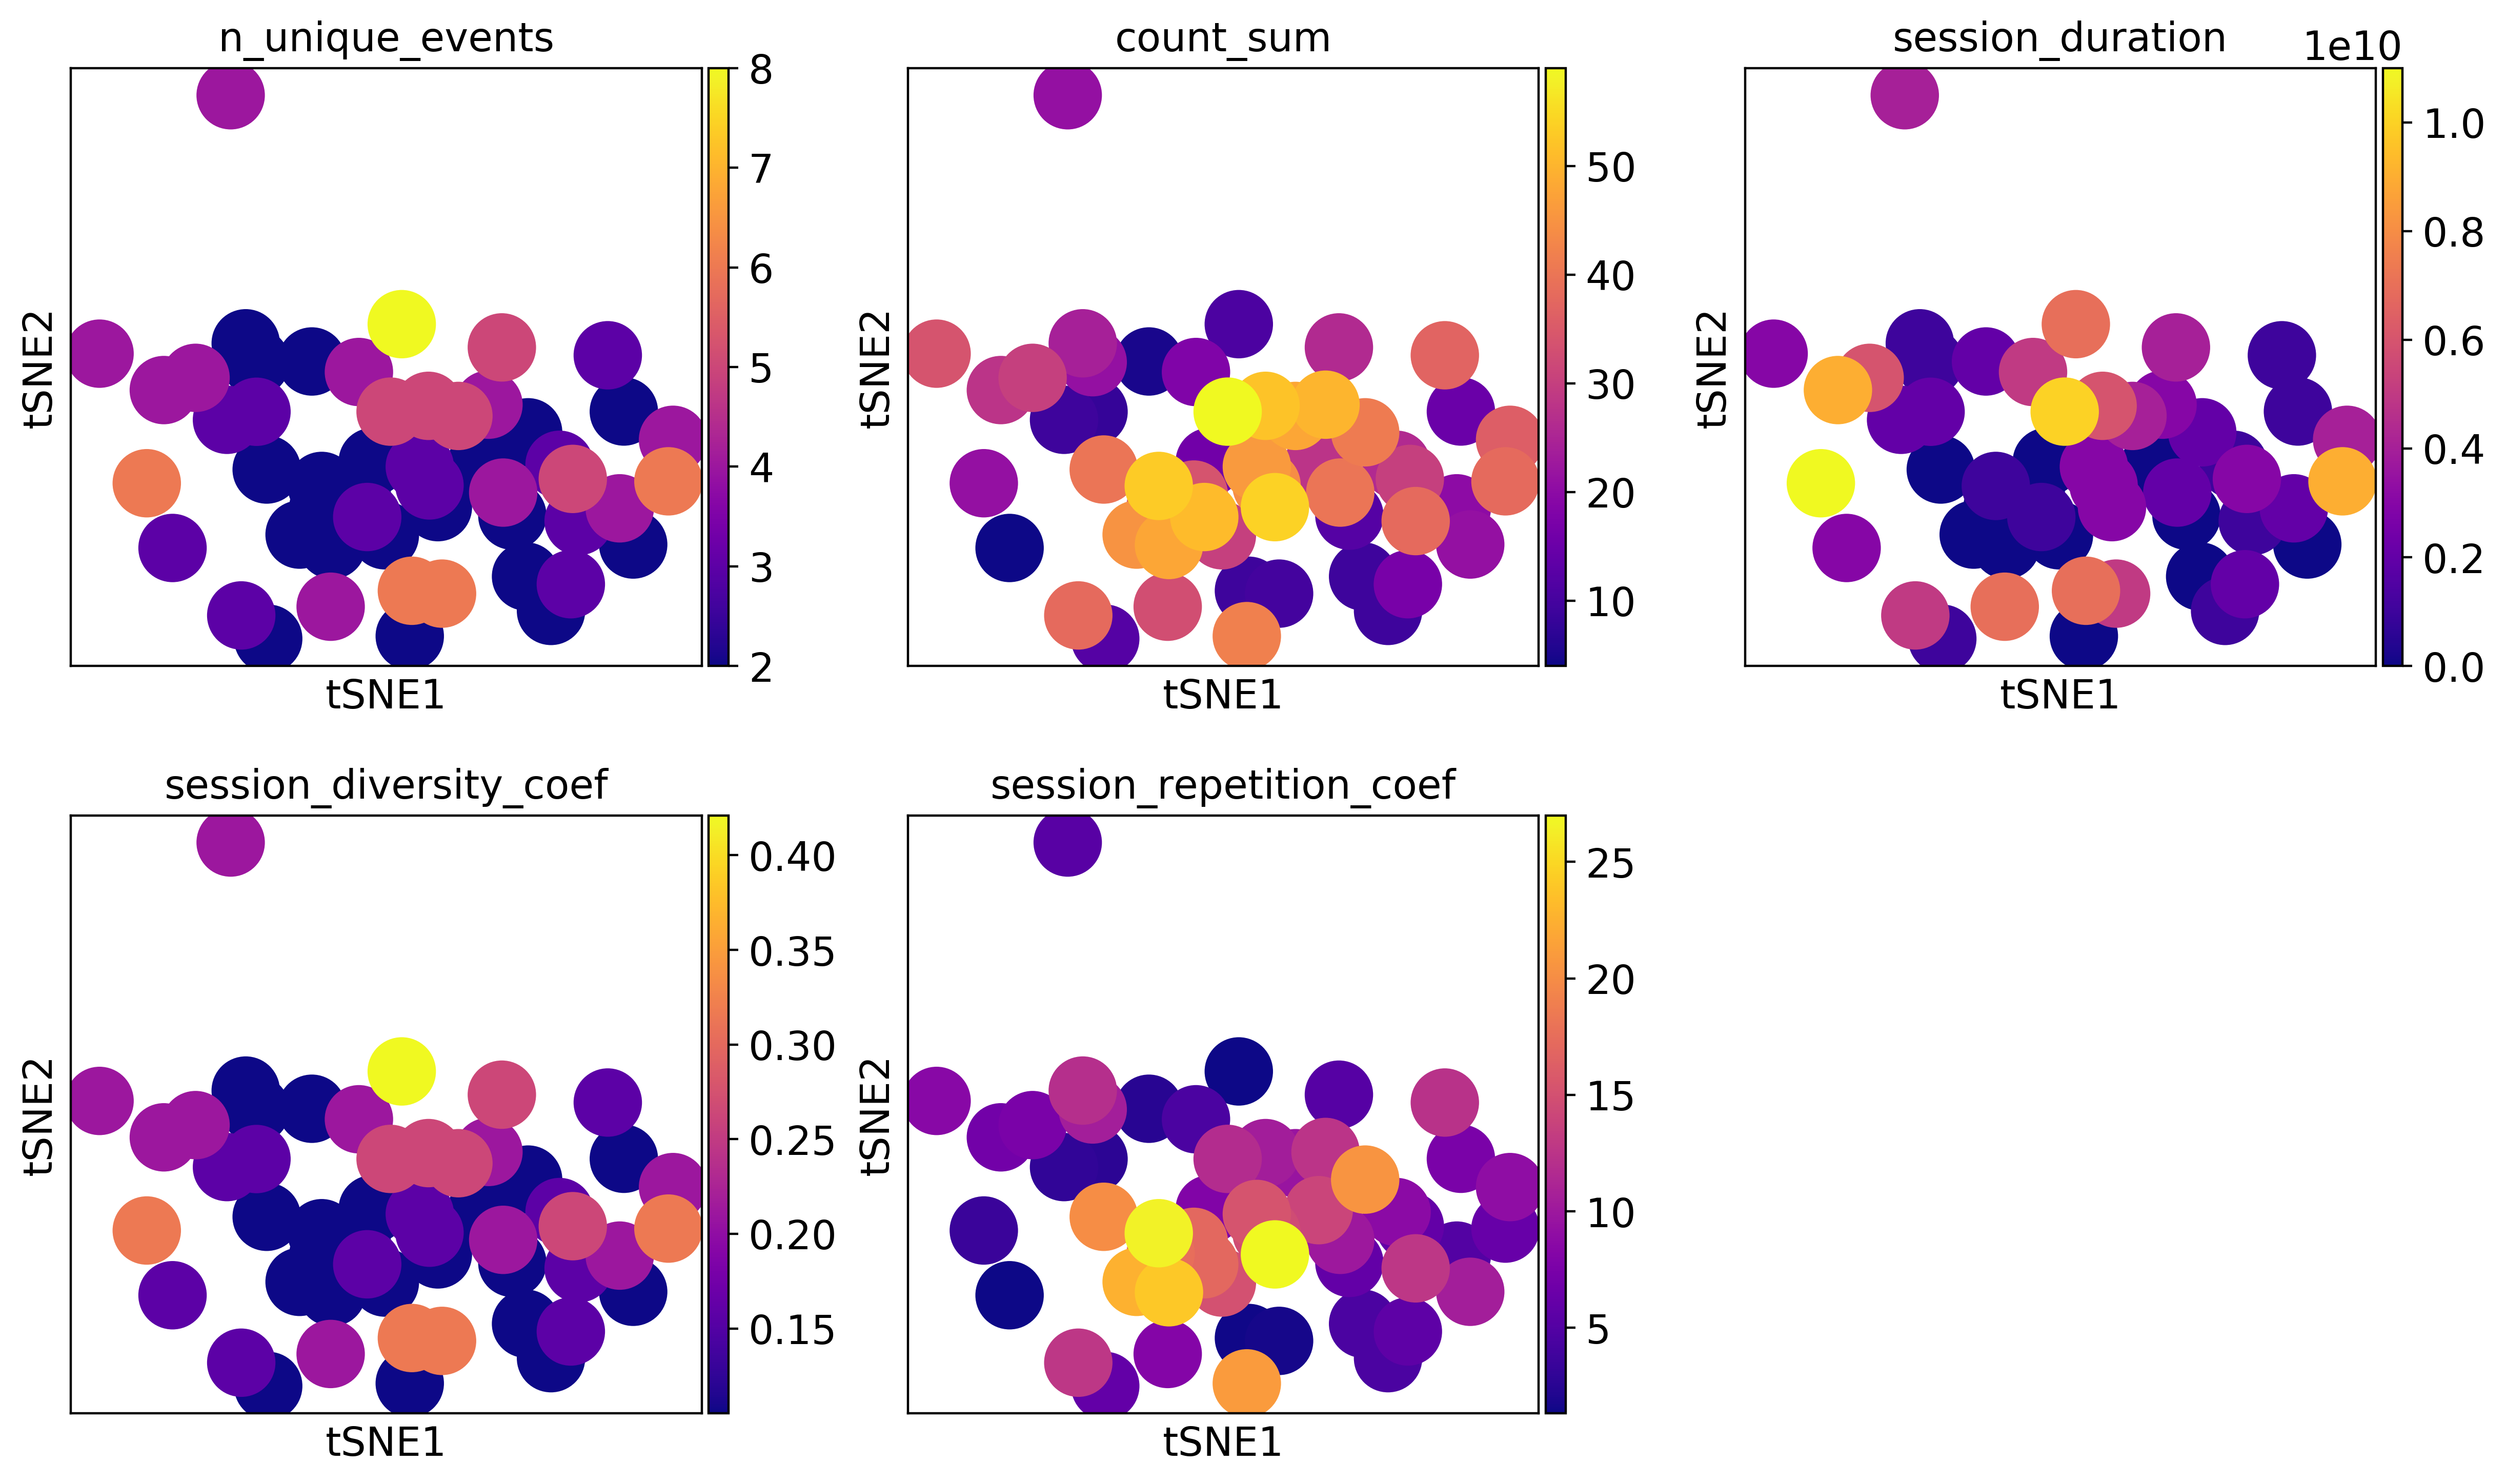

In [61]:
sc.pl.tsne(adata,color=['n_unique_events','count_sum','session_duration','session_diversity_coef','session_repetition_coef'],ncols=3,color_map='plasma')#,palette='Paired')